# 데이터 다루기
- 이미지 데이터를 불러온 후 다뤄보기
- 데이터를 준비하는 단계를 연습
- dataloader를 바로 쓰지 않고 바닥부터 코딩
- 데이터는 .png형식의 MNIST

In [3]:
import os
from glob import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

### 내 작업환경 확인하기

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'data',
 'image',
 'LICENSE',
 'Pytorch0_TensorBoard.ipynb',
 'Pytorch1_Tensor.ipynb',
 'Pytorch2_Autograd.ipynb',
 'Pytorch3_1_DataPreprocessing.ipynb',
 'Pytorch3_BasicOperation.ipynb',
 'Pytorch4_1_Layers&Visualization.ipynb',
 'Pytorch4_Neural_Networks.ipynb',
 'Pytorch5-1_CNN_Classifier(MNSIT dataset).ipynb',
 'Pytorch5_CNN_Classifier(CIFAR10 dataset).ipynb',
 'Pytorch6_NLP_BoW_Classifier.ipynb',
 'Pytorch7_1_RNN_Basic.ipynb',
 'Pytorch7_2_RNN_Basic.ipynb',
 'Pytorch8_RNN_Basic_Sequence.ipynb',
 'Pytorch9_RNN_Basic_Embedding.ipynb',
 'Pytorch_RNN_Image_Classification.ipynb',
 'Pytorch_RNN_NLP_Name_Classification.ipynb',
 'README.md']

In [16]:
print(os.listdir('data/mnist_png/'))
print(os.listdir('data/mnist_png/training'))
print(os.listdir('data/mnist_png/training/0')[:10])

['testing', 'training']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['1.png', '1000.png', '10005.png', '10010.png', '10022.png', '10025.png', '10026.png', '10045.png', '10069.png', '10071.png']


### 특정 문구가 들어간 파일만 불러오기(glob)

In [31]:
train_path_list = glob('data/mnist_png/training/*/*.png') # 확장자가 png인 것만 출력
test_path_list = glob('data/mnist_png/testing/*/*.png') # *은 '모든' 이러는 뜻
image_path_list = glob('data/mnist_png/*/*/*.png')

print(train_path_list[:3])
print('\n')
print(test_path_list[:3])
print('\n')
print(len(train_path_list), len(test_path_list), len(image_path_list))

['data/mnist_png/training\\0\\1.png', 'data/mnist_png/training\\0\\1000.png', 'data/mnist_png/training\\0\\10005.png']


['data/mnist_png/testing\\0\\10.png', 'data/mnist_png/testing\\0\\1001.png', 'data/mnist_png/testing\\0\\1009.png']


60000 10000 70000


### 레이블별 데이터 개수

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0.5,1,'Number of image per label(training)')

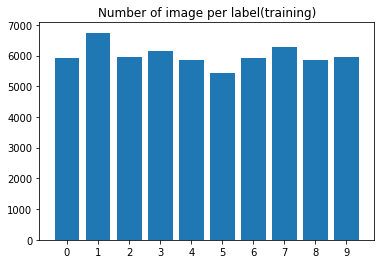

In [38]:
num_per_label = []
labels = []
for label in os.listdir('data/mnist_png/training/'):
    path = 'data/mnist_png/training/' + label + '/'
    labels.append(label)
    image_num = len(glob(path + '*.png'))
    num_per_label.append(image_num)
    
print(num_per_label)

plt.bar(labels, num_per_label)
plt.title('Number of image per label(training)')

### 이미지 확인하기

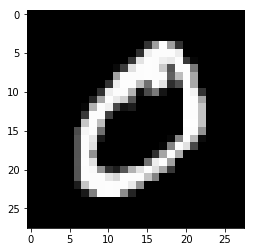

In [41]:
image_path = 'data/mnist_png/training/0/1.png'
image = Image.open(image_path)
image_arr = np.array(image)

plt.imshow(image_arr, 'gray')

### 레이블 추출하기

In [55]:
print(image_path)

names = image_path.split('/')
names

data/mnist_png/training/0/1.png


['data', 'mnist_png', 'training', '0', '1.png']

In [56]:
names[-2]

'0'

### 이미지들의 사이즈 확인하기
- 다른 사이즈가 있는지 검사

In [71]:
from tqdm import tqdm_notebook

In [72]:
path = 'data/mnist_png/training'
print(path)
image_size = []
for label in labels:
    image_path = glob(path + '/{}/*.png'.format(label))
    for p in tqdm_notebook(image_path):
        image = Image.open(p)
        image_arr = np.array(image)
        image_size.append(image_arr.shape)

set(image_size)       

data/mnist_png/training


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

{(28, 28)}